In [1]:
import pandas as pd

In [22]:
df = pd.read_excel('Copy of Employee_Details_0.xlsx')
df.head()

,District Name,Establishment Name,Employee Code,Employee Name,Gender,BirthDate,Designation,Post Name,Hierarchy,IsTeaching,Appointment Status,Schedule RetirementDate,BRC Name,CRCName,BACName,SikkimSubjectNo,Caste Name,Community Name,Religion Name,MartitalStatus
0,East,10TH MILE GOVERNMENT PRIMARY SCHOOL,S0516A0005,JUNU RAI,Female,28750,Primary Teacher,General,83,teaching,Regular,50678.999306,Gangtok Brc,Enchey Government Senior Secondary School,Gangtok,NaN,RAI,MOST BACKWARD CLASS,HINDU,Married
1,East,10TH MILE GOVERNMENT PRIMARY SCHOOL,S0516A0003,KIRAN KUMAR RAI,Male,23523,Primary Teacher,General,83,teaching,Regular,46538.999988,Gangtok Brc,Enchey Government Senior Secondary School,Gangtok,NaN,RAI,MOST BACKWARD CLASS,HINDU,Married
2,East,10TH MILE GOVERNMENT PRIMARY SCHOOL,S0516A0004,SONAM DHENDUP BHUTIA,Male,24132,Primary Teacher,General,83,teaching,Regular,46053.999306,Gangtok Brc,Enchey Government Senior Secondary School,Gangtok,NaN,BHUTIA,SCHEDULE TRIBE,BUDDHIST,Married
3,East,4TH MILE GOVERNMENT JUNIOR HIGH SCHOOL,S0237A0010,ARATI GURUNG,Female,23591,Primary Teacher,General,83,teaching,Regular,45535.999988,Gangtok Brc,Enchey Government Senior Secondary School,Gangtok,720/DCE,GURUNG,MOST BACKWARD CLASS,BUDDHIST,Married
4,East,4TH MILE GOVERNMENT JUNIOR HIGH SCHOOL,S0220A0017,BIMLA THAPA,Female,29468,Graduate Teacher,Bio,3,teaching,Regular,51409.999306,Gangtok Brc,Enchey Government Senior Secondary School,Gangtok,1514/DCE,MANGER,MOST BACKWARD CLASS,HINDU,Married


In [27]:
def fix_excel_date(col):
    return pd.to_datetime(col, origin='1899-12-30', unit='D', errors='coerce')

df['BirthDate'] = fix_excel_date(df['BirthDate'])
df['Schedule RetirementDate'] = fix_excel_date(df['Schedule RetirementDate'])


In [28]:
print(df['BirthDate'].head(10))
print(df['BirthDate'].dtype)

0   1978-09-17
1   1964-05-26
2   1966-01-25
3   1964-08-02
4   1980-09-04
5   1981-08-30
6   1964-04-24
7   1964-06-28
8   1962-12-06
9   1975-08-15
Name: BirthDate, dtype: datetime64[ns]
datetime64[ns]


In [30]:
# Clean categorical columns
string_cols = ['Gender', 'IsTeaching', 'Community Name', 'Religion Name', 'Caste Name', 'MaritalStatus']

for col in string_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.title().replace('Nan', pd.NA)


In [31]:
df.head()

,District Name,Establishment Name,Employee Code,Employee Name,Gender,BirthDate,Designation,Post Name,Hierarchy,IsTeaching,Appointment Status,Schedule RetirementDate,BRC Name,CRCName,BACName,SikkimSubjectNo,Caste Name,Community Name,Religion Name,MartitalStatus
0,East,10TH MILE GOVERNMENT PRIMARY SCHOOL,S0516A0005,JUNU RAI,Female,1978-09-17,Primary Teacher,General,83,Teaching,Regular,2038-09-30 23:59:00.000038149,Gangtok Brc,Enchey Government Senior Secondary School,Gangtok,NaN,Rai,Most Backward Class,Hindu,Married
1,East,10TH MILE GOVERNMENT PRIMARY SCHOOL,S0516A0003,KIRAN KUMAR RAI,Male,1964-05-26,Primary Teacher,General,83,Teaching,Regular,2027-05-31 23:59:59.000006685,Gangtok Brc,Enchey Government Senior Secondary School,Gangtok,NaN,Rai,Most Backward Class,Hindu,Married
2,East,10TH MILE GOVERNMENT PRIMARY SCHOOL,S0516A0004,SONAM DHENDUP BHUTIA,Male,1966-01-25,Primary Teacher,General,83,Teaching,Regular,2026-01-31 23:59:00.000038149,Gangtok Brc,Enchey Government Senior Secondary School,Gangtok,NaN,Bhutia,Schedule Tribe,Buddhist,Married
3,East,4TH MILE GOVERNMENT JUNIOR HIGH SCHOOL,S0237A0010,ARATI GURUNG,Female,1964-08-02,Primary Teacher,General,83,Teaching,Regular,2024-08-31 23:59:59.000006685,Gangtok Brc,Enchey Government Senior Secondary School,Gangtok,720/DCE,Gurung,Most Backward Class,Buddhist,Married
4,East,4TH MILE GOVERNMENT JUNIOR HIGH SCHOOL,S0220A0017,BIMLA THAPA,Female,1980-09-04,Graduate Teacher,Bio,3,Teaching,Regular,2040-09-30 23:59:00.000038149,Gangtok Brc,Enchey Government Senior Secondary School,Gangtok,1514/DCE,Manger,Most Backward Class,Hindu,Married


In [32]:
# Replace NaN in 'SikkimSubjectNo' with 0, drop remaining NaNs and duplicates
df['SikkimSubjectNo'] = df['SikkimSubjectNo'].fillna(0)
df_cleaned = df.dropna().drop_duplicates()

# Display info and stats
print("DataFrame Info (After Cleaning):")
df_cleaned.info()

print("\nStatistical Summary:")
print(df_cleaned.describe())


DataFrame Info (After Cleaning):
<class 'pandas.core.frame.DataFrame'>
Index: 9580 entries, 0 to 11823
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   District Name            9580 non-null   object        
 1   Establishment Name       9580 non-null   object        
 2   Employee Code            9580 non-null   object        
 3   Employee Name            9580 non-null   object        
 4   Gender                   9580 non-null   object        
 5   BirthDate                9580 non-null   datetime64[ns]
 6   Designation              9580 non-null   object        
 7   Post Name                9580 non-null   object        
 8   Hierarchy                9580 non-null   int64         
 9   IsTeaching               9580 non-null   object        
 10  Appointment Status       9580 non-null   object        
 11  Schedule RetirementDate  9580 non-null   datetime64[ns]
 12  BRC N

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [34]:
df = pd.read_excel('Copy of Employee_Details_0.xlsx')

In [35]:
# Check dataset shape
print(" Dataset Shape:", df.shape)
print(" Column Types & Nulls:")
print(df.info())
print("\n Description:")
print(df.describe(include='all'))

 Dataset Shape: (11824, 20)
 Column Types & Nulls:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11824 entries, 0 to 11823
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   District Name            11824 non-null  object 
 1   Establishment Name       11824 non-null  object 
 2   Employee Code            11824 non-null  object 
 3   Employee Name            11824 non-null  object 
 4   Gender                   11824 non-null  object 
 5   BirthDate                11824 non-null  int64  
 6   Designation              11824 non-null  object 
 7   Post Name                11056 non-null  object 
 8   Hierarchy                11824 non-null  int64  
 9   IsTeaching               11824 non-null  object 
 10  Appointment Status       11824 non-null  object 
 11  Schedule RetirementDate  11824 non-null  float64
 12  BRC Name                 9658 non-null   object 
 13  CRCName                  

# Pie chart - Gender distribution

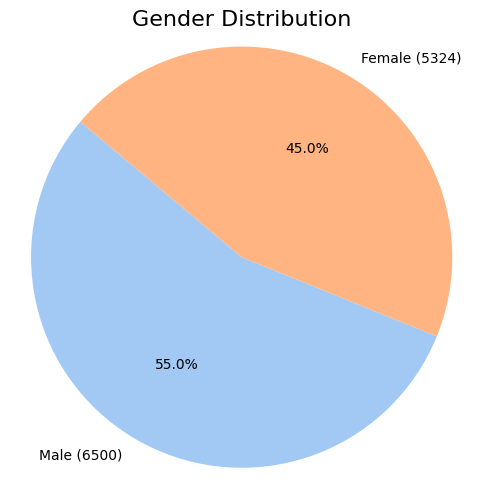

In [38]:
df = pd.read_excel('Copy of Employee_Details_0.xlsx')

if 'Gender' in df.columns:
    df['Gender'] = df['Gender'].astype(str).str.strip().str.title().replace('Nan', pd.NA)
    gender_counts = df['Gender'].value_counts(dropna=True)

    plt.figure(figsize=(5, 5))
    plt.pie(
        gender_counts, 
        labels=[f"{label} ({count})" for label, count in gender_counts.items()],
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette('pastel')
    )
    plt.title("Gender Distribution", fontsize=16)
    plt.axis('equal')  # Ensures pie is circular
    plt.tight_layout()
    plt.show()
else:
    print("'Gender' column not found in the dataset.")

# Countplot - Teaching vs Non-Teaching

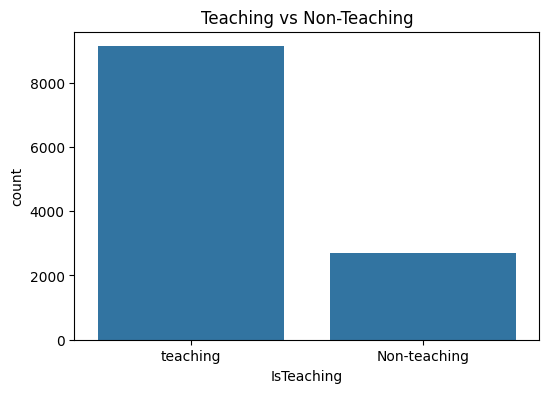

In [39]:
plt.figure(figsize=(6,4))
sns.countplot(x='IsTeaching', data=df)
plt.title("Teaching vs Non-Teaching")
plt.show()

# Top 10 Caste / Community / Religion

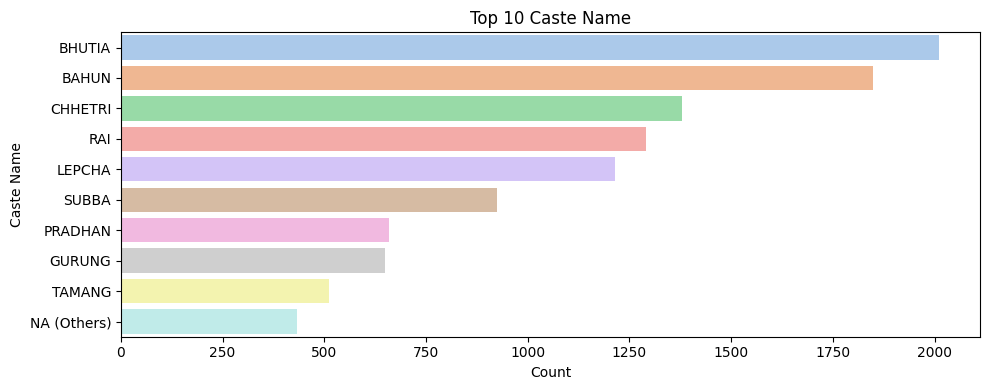

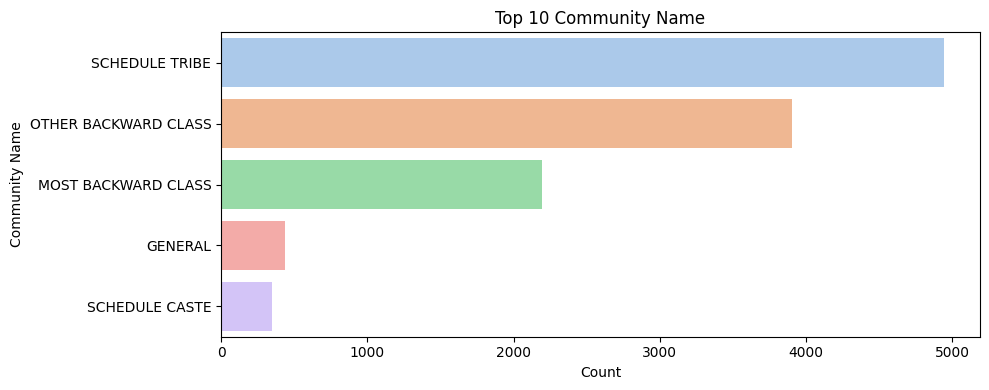

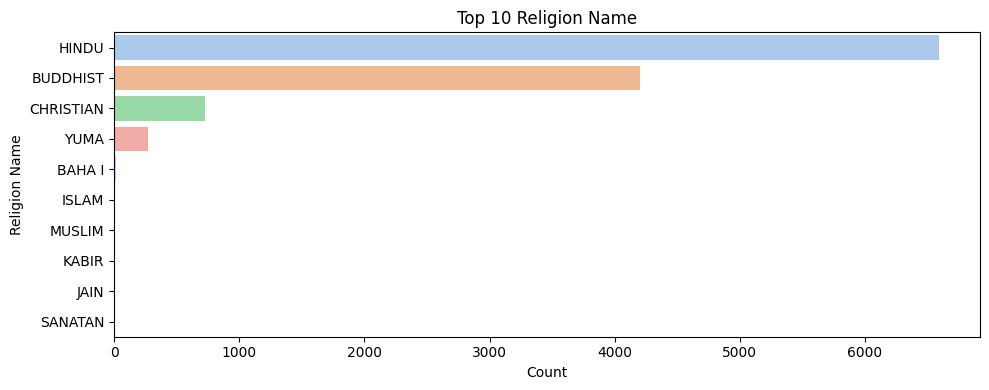

In [41]:
for col in ['Caste Name', 'Community Name', 'Religion Name']:
    plt.figure(figsize=(10, 4))
    top_vals = df[col].value_counts().head(10)
    sns.barplot(
        x=top_vals.values,
        y=top_vals.index,
        hue=top_vals.index, 
        palette='pastel',
        legend=False        
    )
    plt.title(f"Top 10 {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# Designation

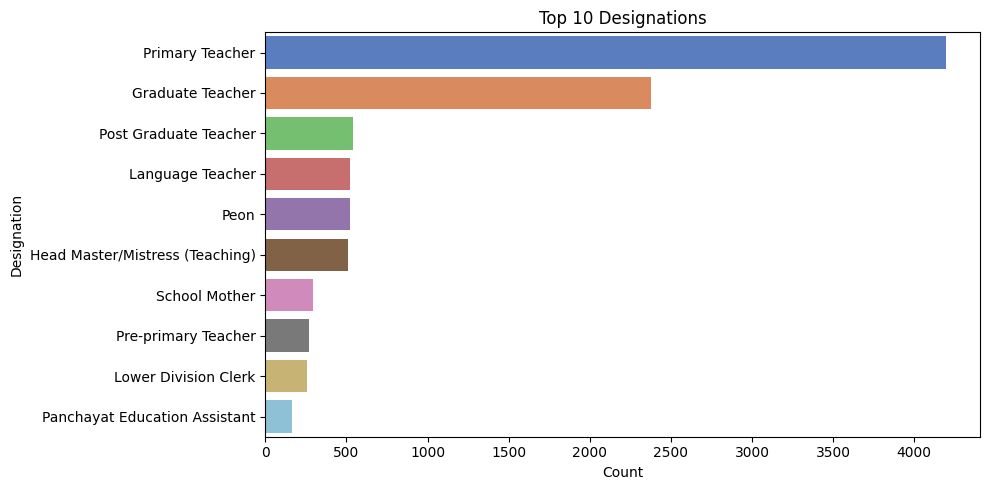

In [43]:
plt.figure(figsize=(10, 5))
top_designations = df['Designation'].value_counts().head(10)
sns.barplot(
    x=top_designations.values, 
    y=top_designations.index, 
    hue=top_designations.index,  
    palette='muted',             
    legend=False                 
)

plt.title("Top 10 Designations")
plt.xlabel("Count")
plt.ylabel("Designation")

plt.tight_layout()
plt.show()

# Heatmap - Correlation

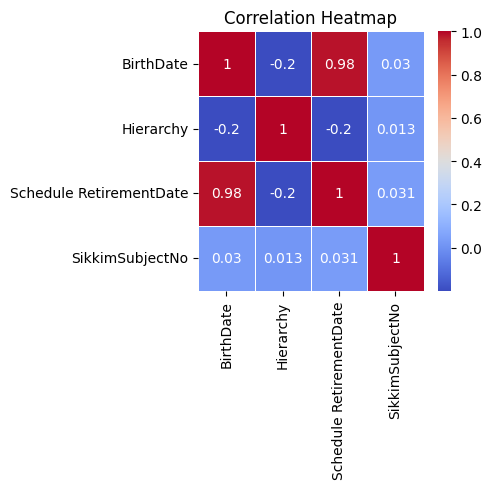

In [45]:
df_numeric = df.copy()
for col in df_numeric.columns:
    df_numeric[col] = pd.to_numeric(df_numeric[col], errors='coerce')
df_numeric = df_numeric.dropna(axis=1, how='all')
df_numeric = df_numeric.loc[:, df_numeric.nunique() > 1]
plt.figure(figsize=(5, 5))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# Donut chart - Appointment Status

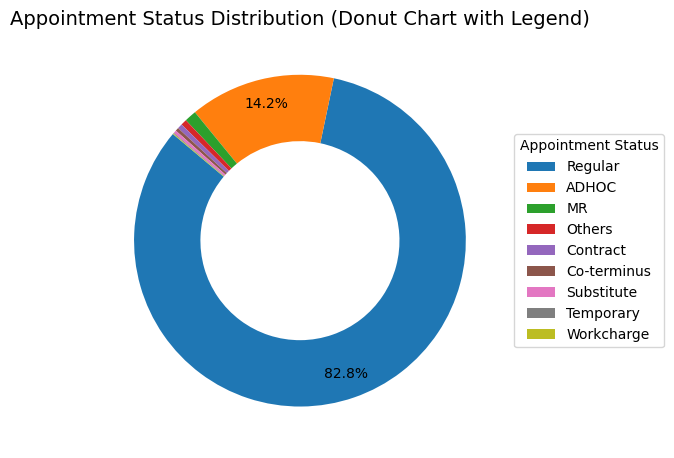

In [48]:
status_counts = df['Appointment Status'].value_counts()
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(
    status_counts,
    labels=None,
    autopct=lambda pct: f'{pct:.1f}%' if pct > 2 else '',
    startangle=140,
    pctdistance=0.85,
    wedgeprops={'width': 0.4}
)
ax.legend(
    wedges, status_counts.index,
    title='Appointment Status',
    loc='center left',
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=10
)
plt.title('Appointment Status Distribution (Donut Chart with Legend)', fontsize=14)
plt.tight_layout()
plt.show()

# Boxplot - Hierarchy vs Teaching

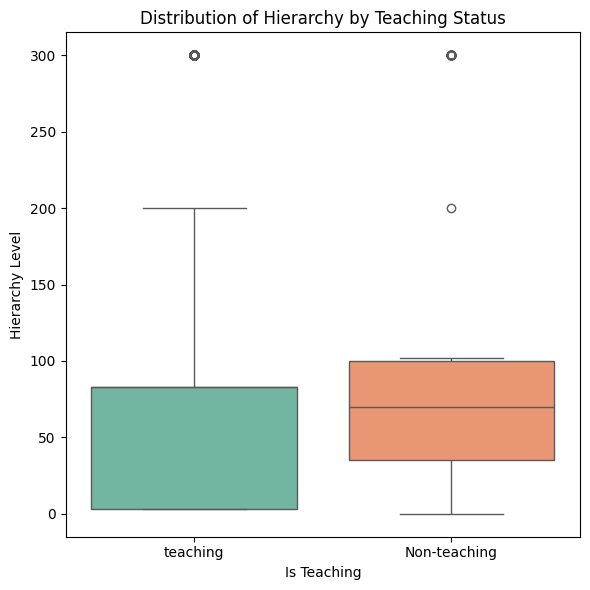

In [50]:
plt.figure(figsize=(6, 6))
sns.boxplot(
    x='IsTeaching', 
    y='Hierarchy', 
    data=df, 
    hue='IsTeaching', 
    palette='Set2',    
    legend=False       
)

plt.title("Distribution of Hierarchy by Teaching Status")
plt.xlabel("Is Teaching")
plt.ylabel("Hierarchy Level")

plt.tight_layout()
plt.show()

# Outlier detection using IQR

In [55]:
import numpy as np
from statsmodels.stats.weightstats import ztest
from scipy.stats import ttest_1samp, ttest_ind, chi2_contingency
df = pd.read_excel('Copy of Employee_Details_0.xlsx')
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
numerical = df.select_dtypes(include=[np.number])

print("\n Outlier Detection using IQR Method:")
for col in numerical.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\n🔹 {col}")
    print(f"IQR Range: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"Outliers Detected: {outliers.shape[0]}")


 Outlier Detection using IQR Method:

🔹 birthdate
IQR Range: [15386.62, 37755.62]
Outliers Detected: 1

🔹 hierarchy
IQR Range: [-104.50, 195.50]
Outliers Detected: 696

🔹 schedule_retirementdate
IQR Range: [37335.00, 59367.00]
Outliers Detected: 6


# One-sample T-test

In [56]:
if 'hierarchy' in df.columns:
    t_stat, p_value = ttest_1samp(df['hierarchy'].dropna(), 100)
    print("\n One-sample T-Test: Is Hierarchy ≠ 100?")
    print(f"T-statistic: {t_stat:.2f}")
    print(f"P-value: {p_value:.4f}")
else:
    print("\n 'hierarchy' column not found for t-test.")


 One-sample T-Test: Is Hierarchy ≠ 100?
T-statistic: -65.43
P-value: 0.0000


# One-sample Z-test

In [57]:
if 'hierarchy' in df.columns:
    hierarchy_data = df['hierarchy'].dropna()
    z_stat, p_value = ztest(hierarchy_data, value=100)
    print("\n One-sample Z-Test: Is Hierarchy ≠ 100?")
    print(f"Z-statistic: {z_stat:.2f}")
    print(f"P-value: {p_value:.4f}")
else:
    print("\n 'hierarchy' column not found for Z-test.")



 One-sample Z-Test: Is Hierarchy ≠ 100?
Z-statistic: -65.43
P-value: 0.0000
